<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°05

## Objetivos de la clase

* Reforzar los conceptos básicos de visualización.

## Contenidos

* [Problema 01](#p1)


## Problema 01

<img src="http://nelsoncos.com/wp-content/uploads/2017/02/sales-icon.png" width="360" height="360" align="center"/>


EL conjunto de datos se denomina `company_sales_data.csv`, el cual contiene información tal como: número del mes, unidades, precio, etc.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(rc={'figure.figsize':(9,6)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","company_sales_data.csv"))
df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


El objetivo es tratar de obtener la mayor información posible de este conjunto de datos. Para cumplir este objetivo debe resolver las siguientes problemáticas:

**Observación.-** Puedes ocupar las librerías de Matplolib o Seaborn.

1. Lea el "total_profit" de todos los meses, muéstrelo usando un gráfico lineal y un gráfico de dispersión.

Gráfico Lineal: 

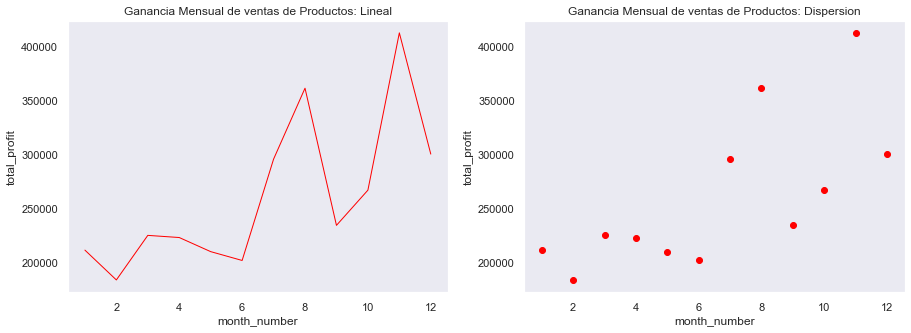

In [13]:
#usando mathplotlib (plt)
x = df['month_number']
y = df['total_profit']
fig = plt.figure(figsize=(15, 5)) 
#grafico de lineas
plt.subplot(1, 2, 1)
plt.plot(
    x,
    y,
    color = "red",
    linewidth=1,
)
plt.title("Ganancia Mensual de ventas de Productos: Lineal") # agregar titulo
plt.xlabel('month_number') # nombre eje x
plt.ylabel('total_profit') # nombre eje y
plt.grid() # agregar grillado

#grafico de dispersion
plt.subplot(1, 2, 2)
plt.scatter(
    x,
    y,
    color = "red",
    linewidth=1,
)
plt.title("Ganancia Mensual de ventas de Productos: Dispersion") 
plt.xlabel('month_number')
plt.ylabel('total_profit') 
plt.grid() 
plt.show() 

Text(0.5, 1.0, 'Ganancia Mensual de ventas de Productos: Dispersion')

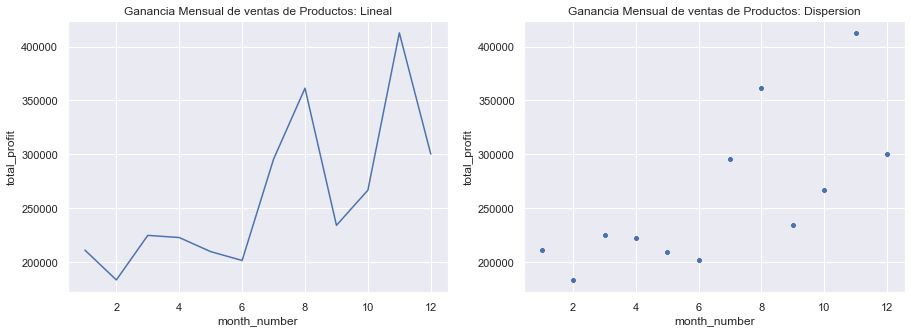

In [4]:
#usando seaborn (sns)
fig,ejes = plt.subplots(1,2,figsize=(15,5))
#lineas
sns.lineplot(
    x = 'month_number',
    y = 'total_profit',
    data = df,
    ax = ejes[0]
)
ejes[0].set_title("Ganancia Mensual de ventas de Productos: Lineal")

#dispersion
sns.scatterplot(
    x = 'month_number',
    y = 'total_profit',
    data = df,
    ax = ejes[1]
)
ejes[1].set_title("Ganancia Mensual de ventas de Productos: Dispersion")

2. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico multilínea.

(Se entendió que se debe graficar la cantidad de productos vendidos en cada mes, con distintos colores para cada producto)

In [14]:
#se despivotea un sub-dataframe con los meses y cantidad de productos vendidos, con respecto a 'month_number'
productos = df[df.columns[0:7]] #obtener el sub-dataframe
productos = productos.melt(
    id_vars = ['month_number'], 
    var_name = 'producto', 
    value_name = 'venta_mensual'
) #despivotear
#productos = productos.sort_values('month_number')
productos

,month_number,producto,venta_mensual
0,1,facecream,2500
1,2,facecream,2630
2,3,facecream,2140
3,4,facecream,3400
4,5,facecream,3600
...,...,...,...
67,8,moisturizer,1400
68,9,moisturizer,1780
69,10,moisturizer,1890
70,11,moisturizer,2100


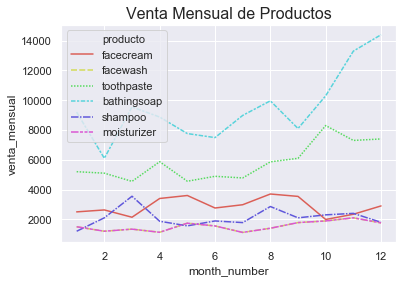

In [6]:
#notar que la columna de ventas para 'facewash' y 'moisturizer' tienen iguales valores por lo que en el 
#grafico se visualizan dos curvas identicas
palette = sns.color_palette("hls", 6)
sns.lineplot(
    x = 'month_number',
    y = 'venta_mensual',
    hue ='producto',
    data = productos,
    palette = palette,
    style ='producto'
)
c = plt.title("Venta Mensual de Productos",size = 16)

3. Lea los datos de ventas de productos de "facecream" y "facewash" y muéstrelos usando el gráfico de barras.

In [7]:
productos = df.filter(items=['month_number','facecream','facewash']) #obtener subdataframe
productos = productos.melt(
    id_vars = ['month_number'], 
    var_name = 'producto', 
    value_name = 'venta_mensual'
) #despivotear
productos

,month_number,producto,venta_mensual
0,1,facecream,2500
1,2,facecream,2630
2,3,facecream,2140
3,4,facecream,3400
4,5,facecream,3600
5,6,facecream,2760
6,7,facecream,2980
7,8,facecream,3700
8,9,facecream,3540
9,10,facecream,1990


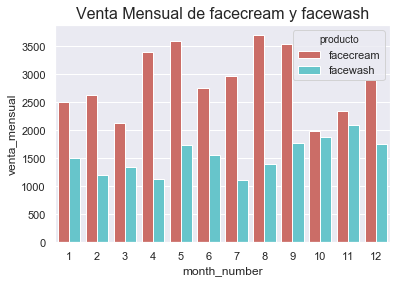

In [8]:
palette = sns.color_palette("hls", 2)
sns.barplot(
    x = 'month_number',
    y = 'venta_mensual',
    hue = 'producto',
    data = productos,
    palette = palette,
)
c = plt.title("Venta Mensual de facecream y facewash",size = 16)

4. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico box-plot.

In [9]:
productos = df.drop(['month_number', 'total_units','total_profit'], axis=1) #obtener subdataframe

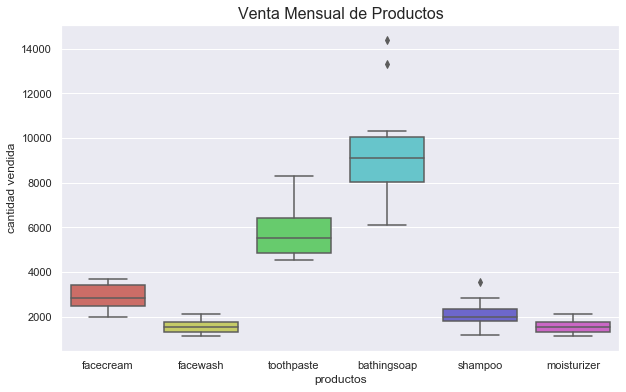

In [10]:
sns.set(rc={'figure.figsize':(10,6)})
palette = sns.color_palette("hls", 6)
sns.boxplot(
    data = productos,
    palette = palette  
)
a = plt.ylabel("cantidad vendida")
b = plt.xlabel("productos")
c = plt.title("Venta Mensual de Productos",size = 16)

5. Calcule los datos de ventas totales del año pasado para cada producto y muéstrelos usando un gráfico circular

In [15]:
productos = df[df.columns[0:7]] #obtener el sub-dataframe
productos = productos.melt(
    id_vars = ['month_number'], 
    var_name = 'producto', 
    value_name = 'venta_mensual'
) #despivotear
grupo = productos.drop(['month_number'],axis=1).groupby('producto').sum() #agrupar por producto y sumar total ventas 
grupo = grupo.rename(columns={'venta_mensual':'venta_total'})
grupo

,venta_total
producto,
bathingsoap,114010
facecream,34480
facewash,18515
moisturizer,18515
shampoo,25410
toothpaste,69910


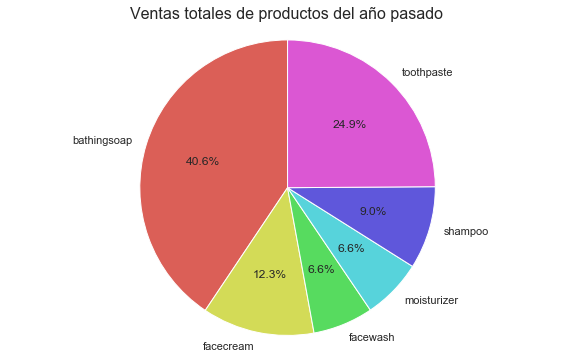

In [12]:
datos = grupo['venta_total']
etiquetas = grupo.index
grafico_circular = plt.pie(
    datos,
    labels = etiquetas,
    autopct='%1.1f%%', 
    startangle = 90,
    colors = palette
)
a = plt.axis('equal')
b = plt.title('Ventas totales de productos del año pasado', size = 16)